In [48]:
 # Install necessary libra ries
 #TASK 1 - Install matplotlib and deap
#       - Import all necessary libraries
!pip install matplotlib deap

In [49]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [50]:
# TODO: Task 2 - Define the number of locations and vehicles

num_locations = 10
# Define the number of locations (eg 10)
locations =  [(random.uniform(0,100), random.uniform(0, 100)) for _ in range(num_locations)]
print (locations)
# Create a list of tuples representing location coordinates -
#try to use a random number generator

depot = random.uniform(0,100), random.uniform(0, 100)
print(depot)
num_vehicles = 3
# Define the number of vehicles - (eg 3)

[(26.853683831442254, 82.8343617048808), (33.77551551707874, 57.79336402609515), (56.614211091714026, 48.533790400850506), (34.37396205526192, 68.25519260932059), (4.840926115172294, 9.957474191620586), (78.38897618405683, 45.958176267356684), (12.423717923039845, 85.76515999286138), (44.128594887642656, 0.06759315121042109), (95.80317693039723, 20.231820639739972), (68.85918819115103, 13.191308738401354)]
(64.99971993406527, 15.897746290581939)


In [53]:
#SOLUTION - TASK 3 and 4

# Genetic Algorithm Setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))  # Define fitness function to minimize. The two objectives are total distance and balance penalty.
creator.create("Individual", list, fitness=creator.FitnessMin)  # Define individual structure. Individuals are lists with a fitness attribute.

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)  # Function to generate a list of unique, randomly ordered location indices
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)  # Function to create an individual as a shuffled list of location indices
toolbox.register("population", tools.initRepeat, list, toolbox.individual)  # Function to create a population of individuals
tool


In [69]:
#SOLUTION CODE


#Fitness Function
def evalVRP(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):

        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]

        # Calculate total distance traveled by this vehicle
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))

        total_distance += vehicle_distance
        distances.append(vehicle_distance)

    balance_penalty = np.std(distances)  # Use standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty
toolbox.register("evaluate", evalVRP)  # Register the fitness functionregistered

In [70]:
#SOLUTION

toolbox.register("mate", tools.cxPartialyMatched)  # Register the crossover function suitable for permutation-based representation
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)  # Register the mutation function to shuffle indices with a 5% chance per index
toolbox.register("select", tools.selTournament, tournsize=3)  # Register the selection function using tournament selection

In [71]:
# SOLUTION - TASK 8
def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    # Draw routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-', 'rs')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

gen	nevals	avg    	min    
0  	300   	356.682	4.10521
1  	220   	338.774	3.41987
2  	240   	330.723	3.28428
3  	229   	324.755	2.57073
4  	228   	318.959	3.64531
5  	218   	306.117	3.02017
6  	220   	302.661	1.09538
7  	232   	295.241	1.83189
8  	223   	286.399	1.6268 
9  	219   	276.87 	3.02017
10 	251   	272.815	3.15869
11 	221   	262.952	4.36566
12 	221   	255.785	4.15745
13 	212   	249.878	4.15745
14 	216   	246.511	4.49254
15 	222   	248.04 	4.34111
16 	229   	241.755	4.72516
17 	230   	239.241	4.72516
18 	228   	238.584	4.72516
19 	244   	235.703	4.72516
20 	223   	233.096	4.72516
21 	222   	234.144	13.8909
22 	223   	232.085	13.8909
23 	218   	231.656	11.0556
24 	240   	232.351	4.72516
25 	227   	232.687	9.80333
26 	235   	230.79 	4.72516
27 	235   	234.548	13.8909
28 	235   	232.633	20.2695
29 	240   	235.59 	13.8909
30 	235   	232.599	13.8909
31 	232   	231.7  	4.72516
32 	229   	232.64 	4.72516
33 	243   	233.804	20.2695
34 	214   	233.137	13.8909
35 	234   	236.04 	17.3171
3

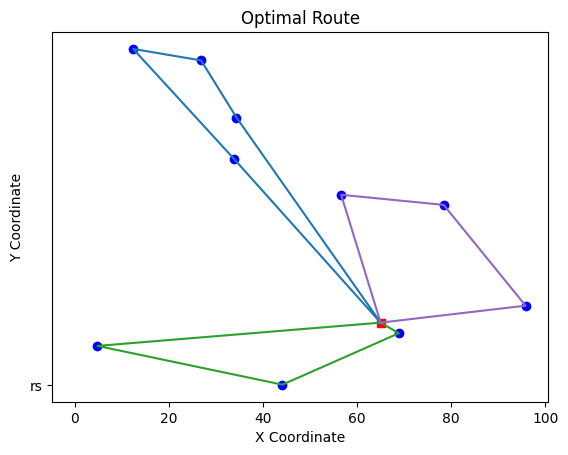

In [72]:
# Running the Genetic Algorithm
# Running the Genetic Algorithm
def main():
    random.seed(42)  # Seed for reproducibility
    pop = toolbox.population(n=300)  # Generate initial population
    hof = tools.HallOfFame(1)  # Hall of Fame to store the best individual

    # Setup statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

if __name__ == "__main__":
  main()
    # TODO: Task 9 - Call the main function, run the algorithm and print the results